[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jleon253/house-rental-prediction/blob/main/house_prediction_WKMC_ANN.ipynb)

## Importación de librerias

In [1]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Colección de datos

In [2]:
url_data = 'https://raw.githubusercontent.com/jleon253/house-rental-prediction/main/data/housing_1.csv';
# url_data = 'housing_1.csv';
df_init = pd.read_csv(url_data);

In [3]:
ds = df_init.sample(5)
ds

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
480,2022-06-26,2,10000,800,Ground out of 3,Carpet Area,Garia,Kolkata,Unfurnished,Bachelors,2,Contact Owner
4018,2022-07-06,3,38000,1496,10 out of 15,Carpet Area,Kondapur,Hyderabad,Semi-Furnished,Bachelors,2,Contact Agent
2244,2022-06-30,2,13500,650,2 out of 3,Carpet Area,Vijayanagar,Bangalore,Unfurnished,Family,2,Contact Owner
3671,2022-06-03,1,13500,450,3 out of 4,Carpet Area,Kodambakkam,Chennai,Unfurnished,Bachelors,1,Contact Owner
3700,2022-06-10,1,5000,450,Ground out of 1,Super Area,Thirumullaivoyal,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner


In [4]:
df_init.shape

(4728, 12)

# Preprocesamiento

## Exploración y limpieza de datos

In [5]:
# Revisión de valores NaN o desconocidos
df_init.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
# Revisión de valores nulos
df_init.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
# Revisión de valores duplicados
df_init.duplicated().sum()

0

In [8]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728 entries, 0 to 4727
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4728 non-null   object
 1   BHK                4728 non-null   int64 
 2   Rent               4728 non-null   int64 
 3   Size               4728 non-null   int64 
 4   Floor              4728 non-null   object
 5   Area Type          4728 non-null   object
 6   Area Locality      4728 non-null   object
 7   City               4728 non-null   object
 8   Furnishing Status  4728 non-null   object
 9   Tenant Preferred   4728 non-null   object
 10  Bathroom           4728 non-null   int64 
 11  Point of Contact   4728 non-null   object
dtypes: int64(4), object(8)
memory usage: 443.4+ KB


## Explorando relacion entre variables

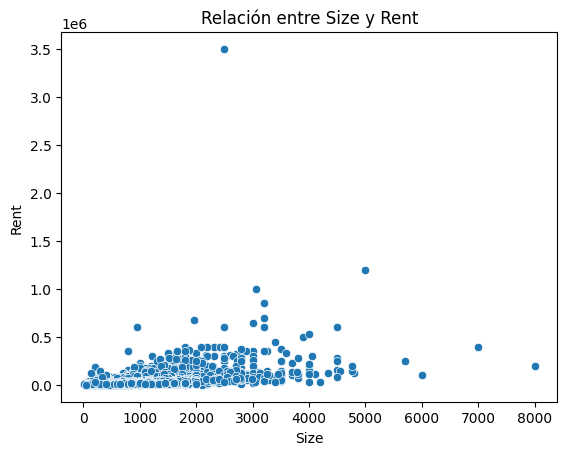

In [9]:
# Tendencias entre las varables explicativas y la variable objetivo
sns.scatterplot(data=df_init, x='Size', y='Rent')
plt.title('Relación entre Size y Rent')
plt.show()

In [10]:
# Registro con el alquiler más alto
rent_high = df_init.query('Rent == 3.5e+06')
rent_high

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent


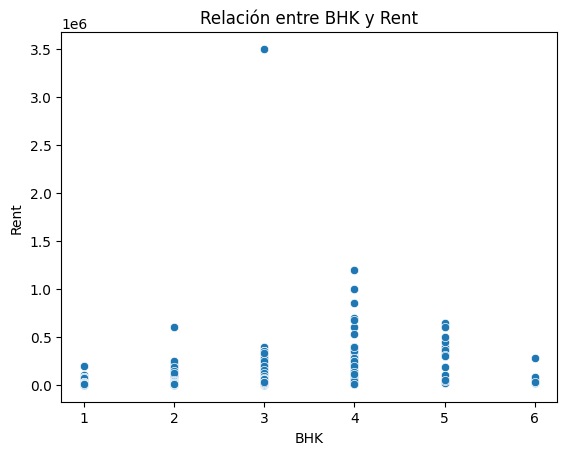

In [11]:
# Tendencias entre las varables explicativas y la variable objetivo
sns.scatterplot(data=df_init, x='BHK', y='Rent')
plt.title('Relación entre BHK y Rent')
plt.show()

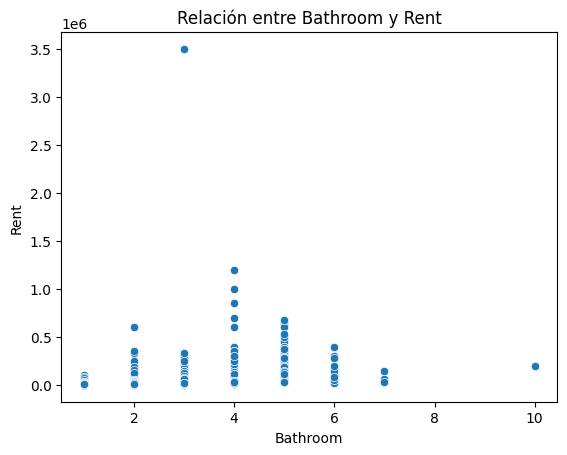

In [12]:
# Tendencias entre las varables explicativas y la variable objetivo
sns.scatterplot(data=df_init, x='Bathroom', y='Rent')
plt.title('Relación entre Bathroom y Rent')
plt.show()

## Codificación categoríca en numerica

Dado que las demas columnas son categoricas, se deben convertir en númericas para un modelado eficiente.

In [13]:
# Se listan las columnas categoricas
category_columns = [
  'Floor',
  'Area Type',
  'Area Locality',
  'City',
  'Furnishing Status',
  'Tenant Preferred',
  'Point of Contact'
];

In [14]:
# Se muestran la cantidad de datos categoricos existentes en el dataset
for col in category_columns:
  print(df_init[col].value_counts())

Floor
1 out of 2                  379
Ground out of 2             349
2 out of 3                  312
2 out of 4                  307
1 out of 3                  293
                           ... 
Upper Basement out of 40      1
10 out of 37                  1
25 out of 48                  1
Upper Basement out of 20      1
12 out of 30                  1
Name: count, Length: 479, dtype: int64
Area Type
Super Area     2437
Carpet Area    2289
Built Area        2
Name: count, dtype: int64
Area Locality
Bandra West                                           37
Gachibowli                                            27
Electronic City                                       24
Velachery                                             22
Miyapur, NH 9                                         21
                                                      ..
Charkop Sector 6                                       1
Hiranandani Gardens Odyssey I, Hiranandani Gardens     1
in Mahim West                        

In [15]:
# Codificando valores categoricos en númericos
le = LabelEncoder()

df_numerical = df_init
# Se retira la columna, dado que el tipo fecha no se puede convertir en float para ser leido por la grafica
del df_numerical['Posted On']

for category_col in category_columns:
  df_numerical[category_col] = le.fit_transform(df_numerical[category_col])

df_numerical

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,454,2,220,4,2,1,2,2
1,2,20000,800,14,2,1523,4,1,1,1,2
2,2,17000,1000,14,2,1755,4,1,1,1,2
3,2,10000,800,10,2,525,4,2,1,1,2
4,2,7500,850,10,1,1885,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4723,2,17000,840,270,2,317,3,0,1,2,2
4724,2,15000,600,192,1,1333,3,2,0,1,2
4725,1,9000,650,14,2,247,3,0,1,1,0
4726,2,16000,1100,200,2,247,3,0,2,2,0


In [16]:
# Dataset númerico
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728 entries, 0 to 4727
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   BHK                4728 non-null   int64
 1   Rent               4728 non-null   int64
 2   Size               4728 non-null   int64
 3   Floor              4728 non-null   int64
 4   Area Type          4728 non-null   int64
 5   Area Locality      4728 non-null   int64
 6   City               4728 non-null   int64
 7   Furnishing Status  4728 non-null   int64
 8   Tenant Preferred   4728 non-null   int64
 9   Bathroom           4728 non-null   int64
 10  Point of Contact   4728 non-null   int64
dtypes: int64(11)
memory usage: 406.4 KB


In [17]:
# Se muestran la cantidad de datos convertidos a númericos que coinciden con los categoricos existentes en el dataset
for c in category_columns:
  print(df_numerical[c].value_counts())

Floor
10     379
454    349
196    312
198    307
14     293
      ... 
475      1
39       1
240      1
470      1
75       1
Name: count, Length: 479, dtype: int64
Area Type
2    2437
1    2289
0       2
Name: count, dtype: int64
Area Locality
224     37
589     27
558     24
2066    22
1266    21
        ..
383      1
730      1
2181     1
1443     1
1375     1
Name: count, Length: 2229, dtype: int64
City
5    972
1    891
0    886
3    850
2    605
4    524
Name: count, dtype: int64
Furnishing Status
1    2243
2    1807
0     678
Name: count, dtype: int64
Tenant Preferred
1    3435
0     826
2     467
Name: count, dtype: int64
Point of Contact
2    3202
0    1525
1       1
Name: count, dtype: int64


## Buscando correlación

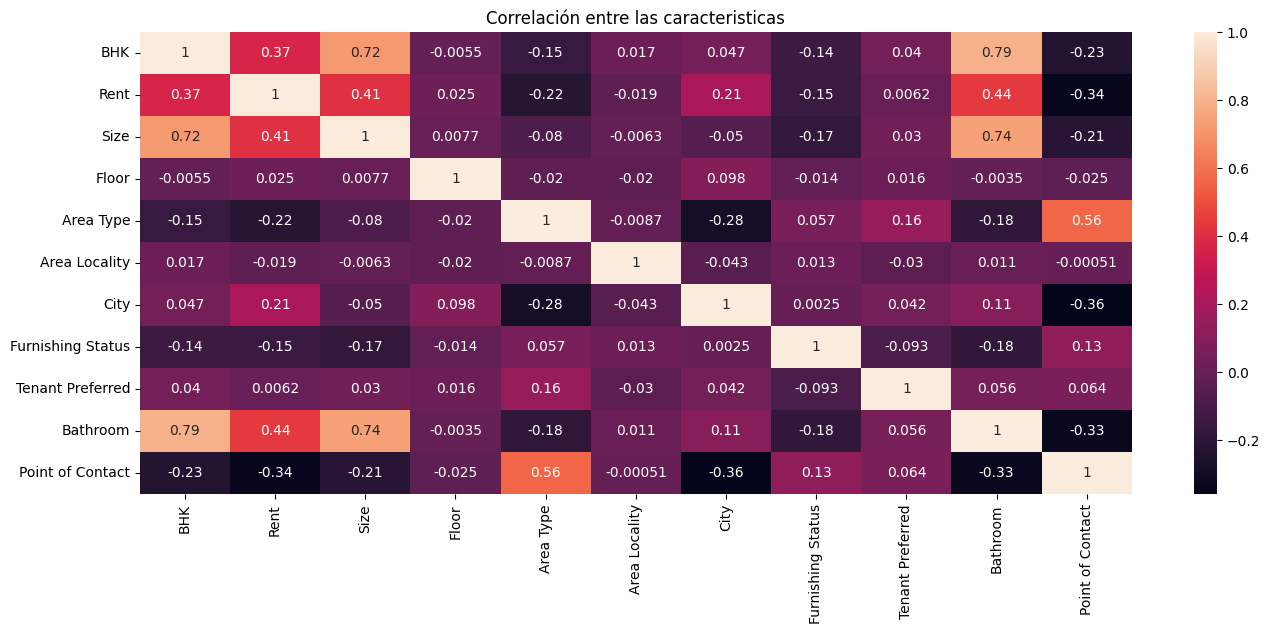

In [18]:
# Se visualiza en un mapa de calor, la correlación entre las caracteristicas
plt.figure(figsize=(16,6))
sns.heatmap(df_numerical.corr(), annot=True)
plt.title('Correlación entre las caracteristicas')
plt.show()

# K-means Clustering

## Relación entre variables

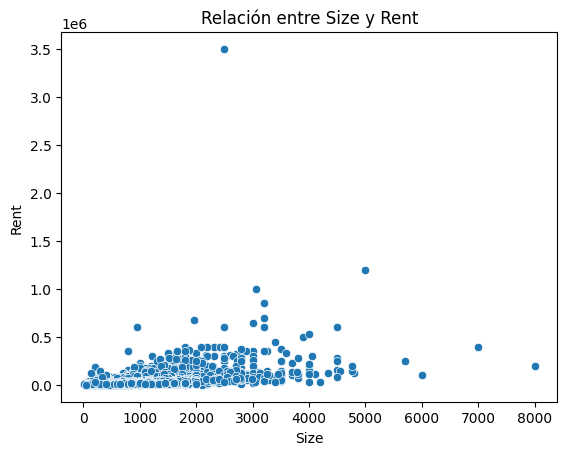

In [19]:
# Tendencias entre las varables explicativas y la variable objetivo
sns.scatterplot(data=df_init, x='Size', y='Rent')
plt.title('Relación entre Size y Rent')
plt.show()

## Implementando agrupación de k-means clustering

### Estandarizadando los datos a la misma magnitud

In [20]:
# Estadistica de la data sin estandarizar
df_numerical.describe()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4728.000000,4.728000e+03,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000
mean,2.082699,3.505223e+04,966.447970,228.963409,1.515017,1089.053934,2.454949,1.238790,0.924069,1.964890,1.354695
std,0.832829,7.824634e+04,634.710489,162.394722,0.500673,631.418420,1.790273,0.684595,0.517463,0.885223,0.934968
min,1.000000,1.200000e+03,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000e+04,550.000000,26.000000,1.000000,550.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,1.600000e+04,850.000000,200.000000,2.000000,1091.500000,2.000000,1.000000,1.000000,2.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,370.000000,2.000000,1627.250000,4.000000,2.000000,1.000000,2.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,478.000000,2.000000,2228.000000,5.000000,2.000000,2.000000,10.000000,2.000000


In [21]:
# Llevando las variables a la misma magnitud
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Estadisticas de la data estandarizada
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.728000e+03,4728.000000,4.728000e+03,4728.000000,4.728000e+03,4.728000e+03,4.728000e+03,4.728000e+03,4.728000e+03,4.728000e+03,4728.000000
mean,-1.382613e-16,0.000000,-3.005680e-17,0.000000,-1.442726e-16,3.606816e-17,-7.213632e-17,-7.814768e-17,9.918744e-17,7.814768e-17,0.000000
std,1.000106e+00,1.000106,1.000106e+00,1.000106,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106
min,-1.300163e+00,-0.432682,-1.507064e+00,-1.410068,-3.026280e+00,-1.724956e+00,-1.371416e+00,-1.809714e+00,-1.785957e+00,-1.090112e+00,-1.449075
25%,-9.930921e-02,-0.320205,-6.561921e-01,-1.249947,-1.028758e+00,-8.538093e-01,-8.127827e-01,-3.488418e-01,1.467518e-01,-1.090112e+00,-1.449075
50%,-9.930921e-02,-0.243516,-1.834857e-01,-0.178371,9.687646e-01,3.874332e-03,-2.541497e-01,-3.488418e-01,1.467518e-01,3.966649e-02,0.690262
75%,1.101545e+00,-0.026231,3.680052e-01,0.868572,9.687646e-01,8.524506e-01,8.631164e-01,1.112030e+00,1.467518e-01,3.966649e-02,0.690262
max,4.704107e+00,44.287240,1.108268e+01,1.533689,9.687646e-01,1.803981e+00,1.421749e+00,1.112030e+00,2.079460e+00,9.077892e+00,0.690262


In [22]:
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.099309,-0.320205,0.210436,1.385885,0.968765,-1.376497,0.863116,1.112030,0.146752,0.039666,0.690262
1,-0.099309,-0.192390,-0.262270,-1.323849,0.968765,0.687329,0.863116,-0.348842,0.146752,-1.090112,0.690262
2,-0.099309,-0.230735,0.052868,-1.323849,0.968765,1.054794,0.863116,-0.348842,0.146752,-1.090112,0.690262
3,-0.099309,-0.320205,-0.262270,-1.348483,0.968765,-0.893407,0.863116,1.112030,0.146752,-1.090112,0.690262
4,-0.099309,-0.352159,-0.183486,-1.348483,-1.028758,1.260702,0.863116,1.112030,-1.785957,-1.090112,0.690262
...,...,...,...,...,...,...,...,...,...,...,...
4723,-0.099309,-0.230735,-0.199243,0.252723,0.968765,-1.222859,0.304483,-1.809714,0.146752,0.039666,0.690262
4724,-0.099309,-0.256298,-0.577408,-0.227639,-1.028758,0.386387,0.304483,1.112030,-1.785957,-1.090112,0.690262
4725,-1.300163,-0.332987,-0.498623,-1.323849,0.968765,-1.333732,0.304483,-1.809714,0.146752,-1.090112,-1.449075
4726,-0.099309,-0.243516,0.210436,-0.178371,0.968765,-1.333732,0.304483,-1.809714,2.079460,0.039666,-1.449075


### Determinar cantidad de clusters a usar

In [23]:
# Se ajustan multiples modelos de k-means para determinar el número optimo de clusters
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', n_init='auto', max_iter=300)
    # Computamos sobre los datos estandarizados
    kmeans.fit(df_scaled)
    # Calculamos la inercia sobre los datos estandarizados
    SSE.append(kmeans.inertia_)

SSE


[52008.000000000065,
 42734.058785257555,
 39260.59815439082,
 35583.52779147135,
 33627.68187155695,
 31794.212112340454,
 30569.11608689595,
 29514.52507598172,
 28397.28259905737,
 26465.371207865814]

Text(0, 0.5, 'Inercia')

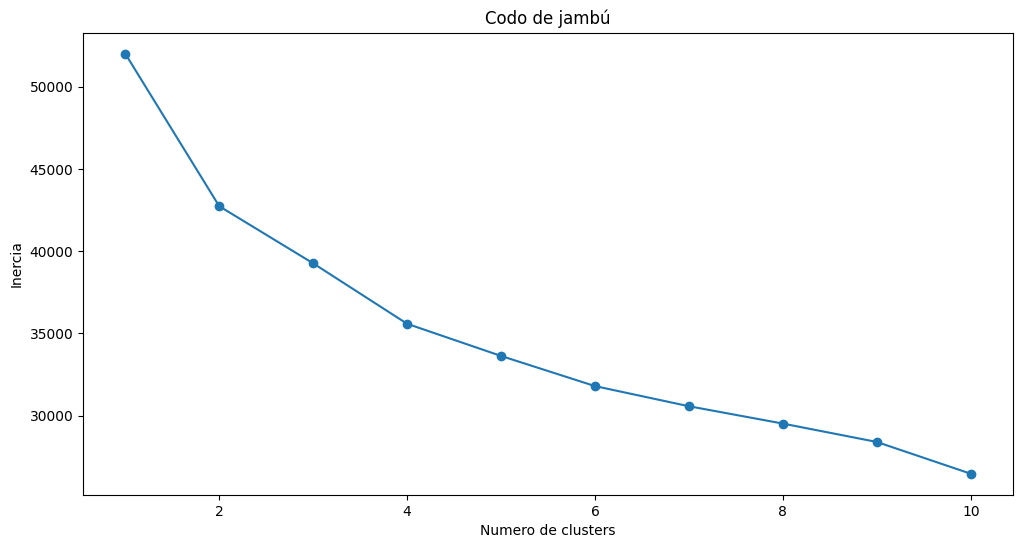

In [24]:
# Convertir los resultados en un dataframe para usar el metodo del "codo"
plt.figure(figsize=(12,6))
plt.plot(range(1,11), SSE, marker='o')
plt.title('Codo de jambú')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia') # Indicador de que tan similares son los individuos dentro de los clusters

Podemos ver que desde el valor 3, la curva deja de descender drasticamente. Esto significa que apartir del número 3 son los valores idoneos para seleccionar los clusters.

## Implementando KMeans library con los clusteres sugeridos

In [25]:
# Cantidad de clusters a usar
kClusters = 3

In [26]:
def get_random_centroids(data, k = 3):
    
    #return random samples from the dataset
    cent = (data.sample(n = k))
    return cent

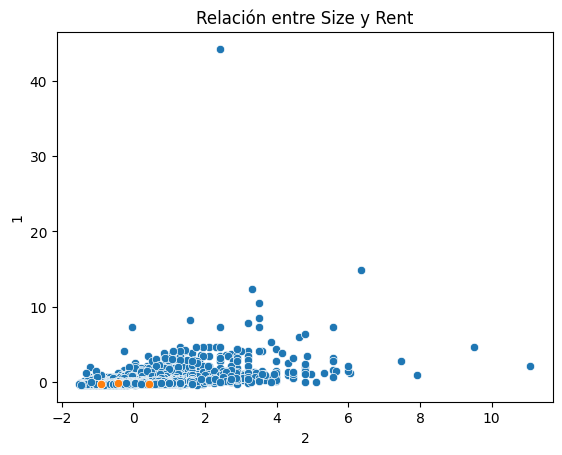

In [27]:
# Tendencias entre las varables explicativas y la variable objetivo

X = pd.DataFrame(df_scaled)[[1,2]]
centroids = get_random_centroids(X, k=kClusters)
sns.scatterplot(data=X, x=2, y=1)
sns.scatterplot(data=centroids, x=2, y=1)
plt.title('Relación entre Size y Rent')
plt.show()

In [28]:
# Segunda prueba (con más clusters)
# Definiendo la función K-means con k-means++ como inicialización
clustering = KMeans(n_clusters=kClusters, init='random', n_init=2, max_iter=5)

# Computamos sobre los datos escalados
clustering.fit(df_scaled)


KMeans(init='random', max_iter=5, n_clusters=3, n_init=2)

In [29]:
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.099309,-0.320205,0.210436,1.385885,0.968765,-1.376497,0.863116,1.112030,0.146752,0.039666,0.690262
1,-0.099309,-0.192390,-0.262270,-1.323849,0.968765,0.687329,0.863116,-0.348842,0.146752,-1.090112,0.690262
2,-0.099309,-0.230735,0.052868,-1.323849,0.968765,1.054794,0.863116,-0.348842,0.146752,-1.090112,0.690262
3,-0.099309,-0.320205,-0.262270,-1.348483,0.968765,-0.893407,0.863116,1.112030,0.146752,-1.090112,0.690262
4,-0.099309,-0.352159,-0.183486,-1.348483,-1.028758,1.260702,0.863116,1.112030,-1.785957,-1.090112,0.690262
...,...,...,...,...,...,...,...,...,...,...,...
4723,-0.099309,-0.230735,-0.199243,0.252723,0.968765,-1.222859,0.304483,-1.809714,0.146752,0.039666,0.690262
4724,-0.099309,-0.256298,-0.577408,-0.227639,-1.028758,0.386387,0.304483,1.112030,-1.785957,-1.090112,0.690262
4725,-1.300163,-0.332987,-0.498623,-1.323849,0.968765,-1.333732,0.304483,-1.809714,0.146752,-1.090112,-1.449075
4726,-0.099309,-0.243516,0.210436,-0.178371,0.968765,-1.333732,0.304483,-1.809714,2.079460,0.039666,-1.449075


In [30]:
# Agregando clasificación como nueva columna al dataset original
df_init['KMeans_Clusters'] = clustering.labels_
# Agregando clasificación como nueva columna al dataset estandarizado
pd.DataFrame(df_scaled)[11] = clustering.labels_
# Agregando clasificación como nueva columna al dataset númerico
df_numerical['KMeans_Clusters'] = clustering.labels_
df_numerical.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,KMeans_Clusters
0,2,10000,1100,454,2,220,4,2,1,2,2,1
1,2,20000,800,14,2,1523,4,1,1,1,2,1
2,2,17000,1000,14,2,1755,4,1,1,1,2,1
3,2,10000,800,10,2,525,4,2,1,1,2,0
4,2,7500,850,10,1,1885,4,2,0,1,2,0


### Visualizando los clusters

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_houses = pca.fit_transform(df_scaled)
pca_houses_df = pd.DataFrame(data=pca_houses, columns=['Componente_1','Componente_2'])
pca_houses_comps = pd.concat([pca_houses_df, df_init[['KMeans_Clusters']]], axis=1)

pca_houses_comps

,Componente_1,Componente_2,KMeans_Clusters
0,-0.526315,0.252237,1
1,-1.064824,0.301135,1
2,-0.938803,0.414058,1
3,-1.343132,0.170668,0
4,-0.872024,-1.165294,0
...,...,...,...
4723,-0.312121,0.710025,1
4724,-1.073572,-1.166338,0
4725,-0.927418,-0.758648,1
4726,0.575660,0.259310,1


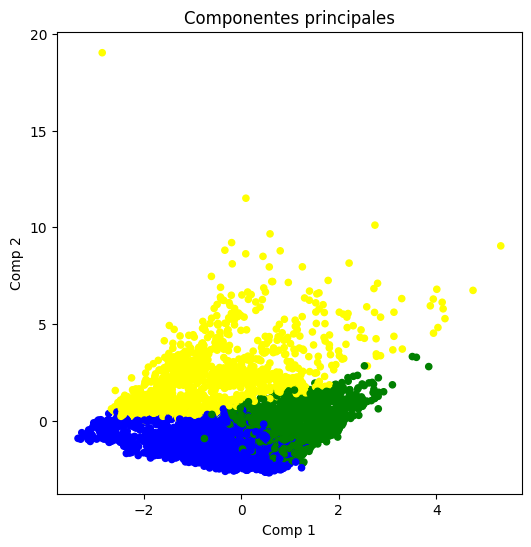

In [32]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Comp 1')
ax.set_ylabel('Comp 2')
ax.set_title('Componentes principales')

color_theme = np.array(['blue', 'green', 'yellow'])
ax.scatter(
  x= pca_houses_comps.Componente_2, 
  y= pca_houses_comps.Componente_1, 
  c=color_theme[pca_houses_comps.KMeans_Clusters], 
  s=20
)

plt.show()

Estos clusters nos permite ver que podemos determinar el valor de una propiedad en base al tamaño de la misma: Alquiler según propiedades grandes, medianas y pequeñas.

In [33]:
# Se predice
pred = clustering.predict(df_scaled)
print(pred)

[1 1 1 ... 1 1 1]


In [34]:
#Valor de recuento de puntos en cada uno de los grupos formados anteriormente

frame = pd.DataFrame(df_numerical)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
0    1787
1    1686
2    1255
Name: count, dtype: int64

## Implementando Red Neuronal library usando los clusters generados

### Dividiendo el conjunto de datos

In [35]:
# Tomamos los datos ya estandarizados para no tener problemas al inicializar la red neuronal

# X_scale = df_scaled[['BHK', 'Size', 'Floor', 'Area Type', 'Furnishing Status', 'Bathroom', 'Kmeans-clusters']]
X_scale = pd.DataFrame(df_scaled)[[0, 2, 3, 4, 7, 9, 10]]

# Y_scale = df_scaled['Rent]
Y = pd.DataFrame(df_scaled)[1]

Dividimos nuestro conjunto de datos en un conjunto de entrenamiento, un conjunto de validación y un conjunto de prueba.

In [36]:
from sklearn.model_selection import train_test_split

# Esto le dice a scikit-learn que el tamaño val_and_test será el 30% del conjunto de datos estandarizados.
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)


In [37]:
# Esto dividirá el tamaño de val_and_test en partes iguales entre el conjunto de validación y el conjunto de prueba.
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [38]:
# X_train (6 funciones de entrada, 70% del conjunto de datos completo)
# X_val (6 funciones de entrada, 15 % del conjunto de datos completo)
# X_test (6 funciones de entrada, 15 % del conjunto de datos completo)
# Y_train (1 etiqueta, 70 % del conjunto de datos completo)
# Y_val (1 etiqueta, 15 % del conjunto de datos completo)
# Y_test (1 etiqueta, 15 % del conjunto de datos completo)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(3309, 7) (709, 7) (710, 7) (3309,) (709,) (710,)


- Como se puede ver, el conjunto de entrenamiento tiene 3309 puntos de datos, mientras que el conjunto de validación y prueba tiene 709 y 710 puntos de datos cada uno. 
- Las variables X tienen 6 características de entrada, mientras que las variables Y solo tienen una característica para predecir.

### Construyendo la red neuronal

#### Arquitectura

Se tendran estas capas:
- Capa oculta 1: 32 neuronas, activación ReLU
- Capa oculta 2: 32 neuronas, activación ReLU
- Capa de salida: 1 neurona, activación sigmoidea

In [39]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [40]:
# Se crea el modelo con 3 capas
# Se tienen 32 neuronas por capa
# Forma de entrada es 6 ya que tenemos 6 caracteristicas de entrada y se aplica a la siguiente capa
# Dense nos indica que las capas estan completamente conectadas

model = Sequential([
    Dense(32, activation='relu', input_shape=(7,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1345 (5.25 KB)
Trainable params: 1345 (5.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Configuración de modelo

In [41]:
# Se indica:
# Algoritmo para optimización
# Función de perdida

model.compile(
  optimizer='sgd', # Descenso de gradiente estocastico o mini lotes
  loss='binary_crossentropy', # Entropia cruzada binaria: función para salidas entre 0 y 1
  metrics=['accuracy'] # Seguimiento de la precisión
)

#### Entrenamiento de modelo

In [42]:
# Se almacena el historial de entrenamiento

hist = model.fit(
  X_train, # Datos de entrenamiento
  Y_train,
  batch_size=32, # Tamaño de mini lote
  epochs=100, # Tiempo de entrenamiento: Epocas
  validation_data=(X_val, Y_val) # Datos de validación por cada ciclo
)

Epoch 1/100
104/104 [==============================] - 3s 11ms/step - loss: 0.2650 - accuracy: 0.0000e+00 - val_loss: -0.0775 - val_accuracy: 0.0000e+00
Epoch 2/100
104/104 [==============================] - 0s 4ms/step - loss: -0.4060 - accuracy: 0.0000e+00 - val_loss: -0.8652 - val_accuracy: 0.0000e+00
Epoch 3/100
104/104 [==============================] - 0s 4ms/step - loss: -1.8684 - accuracy: 0.0000e+00 - val_loss: -3.4850 - val_accuracy: 0.0000e+00
Epoch 4/100
104/104 [==============================] - 0s 4ms/step - loss: -13.1420 - accuracy: 0.0000e+00 - val_loss: -43.8569 - val_accuracy: 0.0000e+00
Epoch 5/100
104/104 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/100
104/104 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/100
104/104 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.000

#### Evaluación del modelo

In [43]:
# La función devuelve la pérdida como primer elemento y la precisión como segundo elemento. 

model.evaluate(X_test, Y_test)[1]

23/23 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00


0.0

### Visualización de perdida

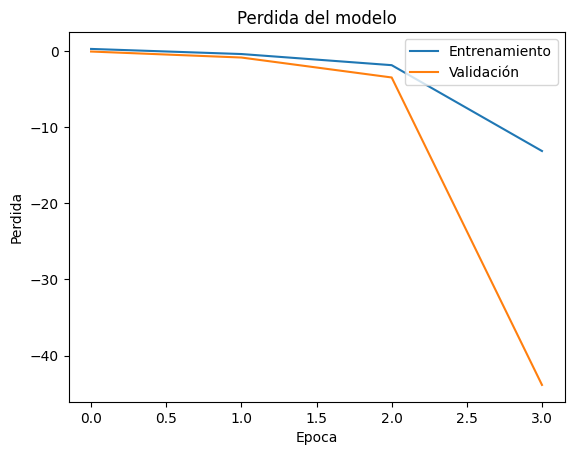

In [44]:
# Grafico de perdida

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

### Visualización de presición

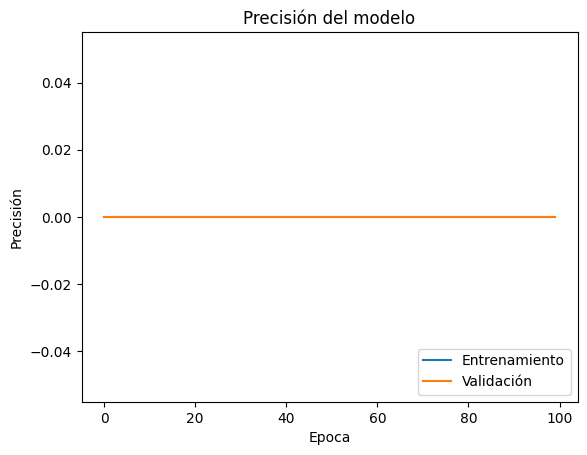

In [45]:
# Grafico de presición

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

### Construyendo Red Neuronal LSTM (Long Short Term Memory)

#### Creando modelo

In [46]:
X_train.shape

(3309, 7)

In [47]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(128, return_sequences=True, 
               input_shape= (X_train.shape[1], 1)))
modelLSTM.add(LSTM(64, return_sequences=False))
modelLSTM.add(Dense(25))
modelLSTM.add(Dense(1))
modelLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 25)                1625      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Entrenando modelo

In [48]:
modelLSTM.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])
histLSTM = modelLSTM.fit(X_train, Y_train, batch_size=10, epochs=10, validation_data=(X_val, Y_val))

Epoch 1/10
331/331 [==============================] - 17s 26ms/step - loss: 1.0366 - accuracy: 0.0000e+00 - val_loss: 0.6544 - val_accuracy: 0.0000e+00
Epoch 2/10
331/331 [==============================] - 6s 18ms/step - loss: 1.0618 - accuracy: 0.0000e+00 - val_loss: 0.2359 - val_accuracy: 0.0000e+00
Epoch 3/10
331/331 [==============================] - 5s 15ms/step - loss: 0.9750 - accuracy: 0.0000e+00 - val_loss: 0.2263 - val_accuracy: 0.0000e+00
Epoch 4/10
331/331 [==============================] - 5s 16ms/step - loss: 0.9634 - accuracy: 0.0000e+00 - val_loss: 0.2000 - val_accuracy: 0.0000e+00
Epoch 5/10
331/331 [==============================] - 8s 25ms/step - loss: 0.9466 - accuracy: 0.0000e+00 - val_loss: 0.1726 - val_accuracy: 0.0000e+00
Epoch 6/10
331/331 [==============================] - 7s 22ms/step - loss: 0.9225 - accuracy: 0.0000e+00 - val_loss: 0.2084 - val_accuracy: 0.0000e+00
Epoch 7/10
331/331 [==============================] - 7s 22ms/step - loss: 0.9193 - accuracy:

#### Evaluando el modelo

In [49]:
# La función devuelve la pérdida como primer elemento y la precisión como segundo elemento. 

modelLSTM.evaluate(X_test, Y_test)[1]

23/23 [==============================] - 0s 9ms/step - loss: 0.1521 - accuracy: 0.0000e+00


0.0

#### Visualizando la perdida

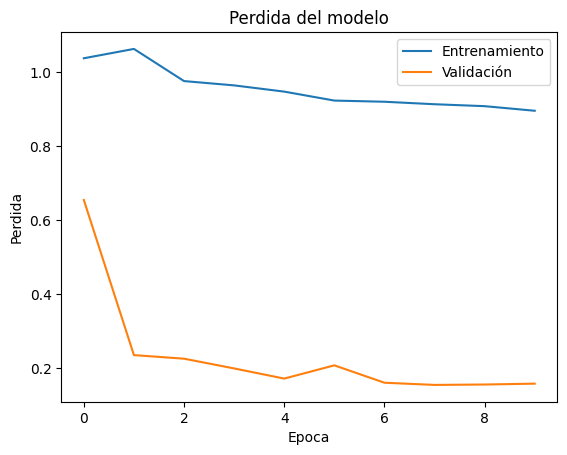

In [50]:
# Grafico de perdida

plt.plot(histLSTM.history['loss'])
plt.plot(histLSTM.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

##### Visualizando la precisión

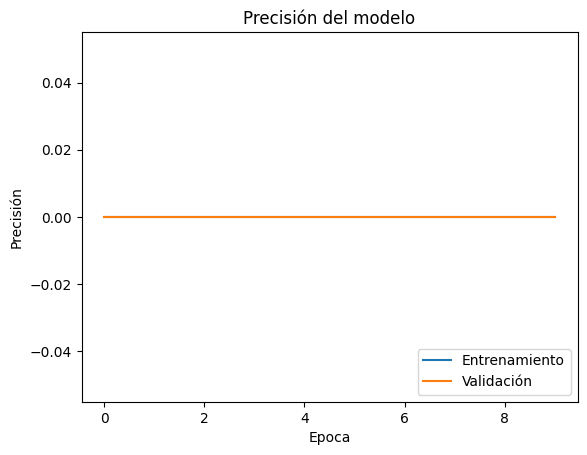

In [51]:
# Grafico de presición

plt.plot(histLSTM.history['accuracy'])
plt.plot(histLSTM.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

## Probando modelo

In [ ]:
print("Enter House Details to Predict Rent")
print("BHK = Bedrooms, Hall, and Kitchen\n")
a = int(input("Number of BHK (1 -- 6): "))
b = int(input("Size of the House (10 -- 8000): "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Floor (1 -- 6): "))
e = int(input("Furnishing Status of the House: "))
f = int(input("Number of bathrooms (1 -- 10): "))
features = np.array([[a, b, c, d, e, f]])
print("Predicted House Price = ", modelLSTM.predict(features))